<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   origin    920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None
   id  age     sex     origin               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina    

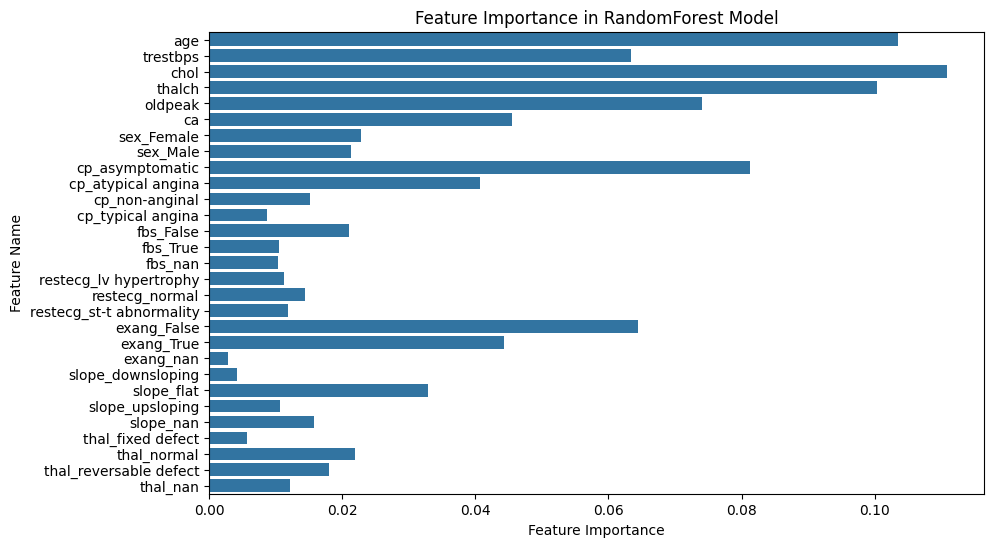

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Загрузка данных
file_path = "heart_disease_uci.csv"  # Укажите путь к файлу, если требуется
df = pd.read_csv(file_path)

# Просмотр информации о данных
print(df.info())
print(df.head())

# Целевая переменная
target = 'num'

# Преобразуем целевую переменную в бинарный формат (0 - нет заболевания, 1 - есть заболевание)
df[target] = df[target].apply(lambda x: 1 if x > 0 else 0)

# Разделение признаков на числовые и категориальные
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# Разделение данных на обучающую и тестовую выборки
X = df.drop(columns=['id', 'origin', target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Преобразование данных
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Определение модели
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Создание пайплайна
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model)])

# Обучение модели
pipeline.fit(X_train, y_train)

# Предсказания
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

# Оценка качества модели
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred),
    "ROC AUC Score": roc_auc_score(y_test, y_proba)
}

print("Model Performance Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

# Визуализация важности признаков
feature_importances = model.feature_importances_
feature_names = numerical_features + list(pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out())

# Построение графика важности признаков
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance in RandomForest Model")
plt.show()
